In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
import seaborn as sns

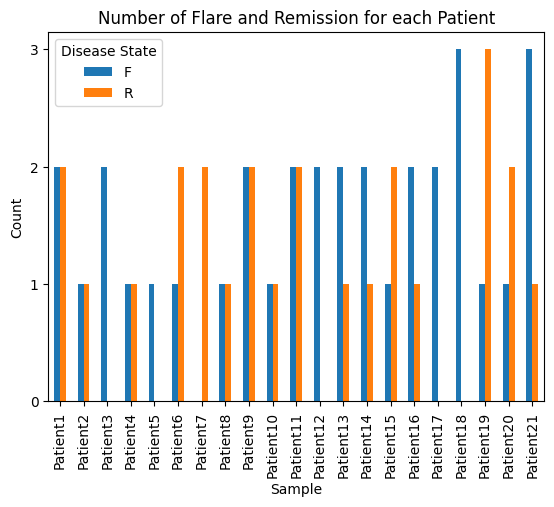

In [2]:
'''
This block is to make a histogram of the number of F and R for each patient.
'''
df = pd.read_csv('C:/Users/administer/Desktop/PCM__EHR/pigeon/ehr/index.csv')
counts = df.groupby(['Sample', 'Disease State']).size().unstack(fill_value=0)
counts['PatientNum'] = counts.index.str.replace('Patient', '').astype(int)
counts = counts.sort_values(by='PatientNum')
counts = counts.drop(columns='PatientNum')

plot = counts.plot(kind='bar', stacked=False)

plt.title('Number of Flare and Remission for each Patient')
plt.xlabel('Sample')
plt.ylabel('Count')
plot.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

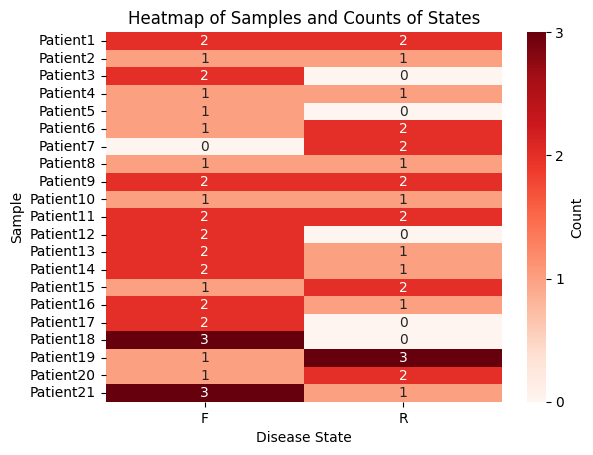

In [3]:
'''
This block is to make a heatmap of the number of F and R for each patient.
'''
plot_heatmap_num = sns.heatmap(counts, annot=True, cmap="Reds")

plt.title('Heatmap of Samples and Counts of States')
plt.xlabel('Disease State')
plt.ylabel('Sample')

cbar = plot_heatmap_num.collections[0].colorbar
cbar.set_label('Count')
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['0', '1', '2', '3'])

plt.show()

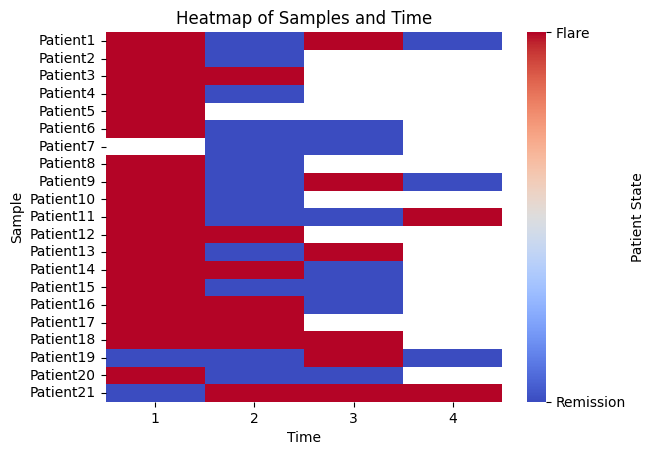

In [4]:
df = pd.read_csv('C:/Users/administer/Desktop/PCM__EHR/pigeon/ehr/index.csv')
df = df.drop(columns=['Unnamed: 0', 'Location'])

df_pivot = df.pivot(index='Sample', columns='Time', values='Disease State')
df_pivot['PatientNum'] = df_pivot.index.str.replace('Patient', '').astype(int)
df_pivot = df_pivot.sort_values(by='PatientNum')
df_pivot = df_pivot.drop(columns='PatientNum')
# F=1, R=0
df_pivot = df_pivot.replace({'F': 1, 'R': 0})

cmap = sns.color_palette("coolwarm", as_cmap=True)
plot_heatmap_time=sns.heatmap(df_pivot, cmap=cmap)

plt.title('Heatmap of Samples and Time')
plt.xlabel('Time')
plt.ylabel('Sample')

cbar = plot_heatmap_time.collections[0].colorbar
cbar.set_label('Patient State')
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Remission', 'Flare'])

plt.show()